# Exploration of Distributions
Today, we visit the top 3 most common distributions used in real-life data science projects, accompanied with the python code to explore, play around, and ready to implement into your projects. Feel free to fork/download this notebook from my Github.

Inspired by the useful ontology of distributions <a href='https://miro.medium.com/max/1400/1*szMCjXuMDfKu6L9T9c34wg.png'>here</a>, I have added a little more information to quickly differentiate and establish the relationship between them:
<img src='http://datageeko.com/imgs/distributions_map_v1.jpg' width=600/>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Normal Distribution
The most common <b>continuous</b> probability distribution for a real-valued random variable and also known as "bell curve". Parameterized by mean($\mu$) and standard deviation($\sigma$), the general form of its probability density function(PDF) is
$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}
$$

In [2]:
#generate samples of normal distribution
from scipy.stats import norm
import scipy

### Generating random numbers under normal distribution
We could use <a href='https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html'>numpy's random.randn function</a> or perhaps more commonly in practice <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html'>scipy's stats.norm function</a> to generate random samples for different types of distribution.
To generate them for normal distribution using the parameterized mean and std dev:

In [3]:
np.random.seed(888)
r = norm.rvs(size=1000,loc=0, scale=1)

In [4]:
r[:10]

array([-0.17620087,  0.18887636,  0.82674718, -0.03244731, -0.65249942,
       -0.10533938,  0.21777612,  0.5872815 ,  0.10023789, -1.09994668])

### Visualizing distribution using histogram
Histogram shows the frequency of the values.

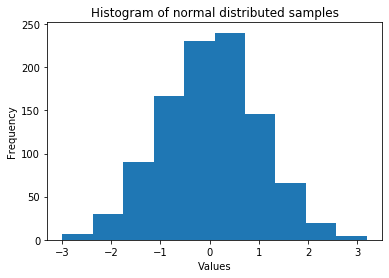

In [5]:
#visualize the normal distribution samples
plt.hist(r)
plt.title('Histogram of normal distributed samples')
plt.xlabel('Values'), plt.ylabel('Frequency')
plt.show()

### Probability Density Function (PDF)
If we normalize the proportion, we would get a PDF where we could estimate the probability of the random variable being a certain value, or to be specific P(X=x).

PDF = normalized version of a histogram.

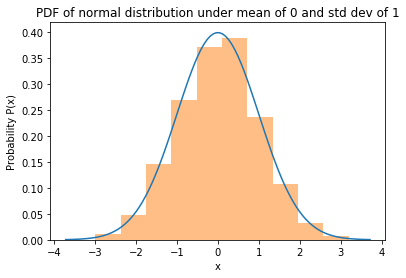

In [6]:
# linspace = Return evenly spaced numbers over a specified interval. params = start, stop, number of samples.
# used to generate uniform distribution samples
# in this case, we generate the ppf(std dev of the norm) for the plotting of X axis
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.plot(x, norm.pdf(x))
plt.hist(r, density=True, histtype='stepfilled', alpha=0.5)
#plt.axvline(x=0.55,color='r',linestyle='dashed')
#plt.axhline(y=0.342,color='r',linestyle='dashed')
plt.title('PDF of normal distribution under mean of {} and std dev of {}'.format(0,1))
plt.xlabel('x'), plt.ylabel('Probability P(x)')
plt.show()

It answers the question: under a normal distribution, what's the probablity of X being 1.4? P(X=1.4) = ?

We could use <b>numpy's pdf function</b> to find out:

In [7]:
# prob of 14.97% that random variable X has a value of 1.4
norm.pdf(1.4)

0.14972746563574488

Saying that value at that specific point actually feels weird because it's techically a continuous variable. And the correct answer would be 0 but we'll get to that point later.

### Cumulative distribution function (CDF)
Parameters: Mean of 0, std dev of 1

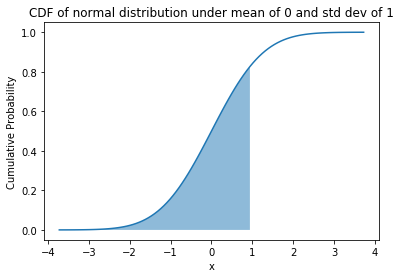

In [8]:
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.plot(x, norm.cdf(x))
plt.fill_between(x[x<=1], 0, norm.cdf(x)[x<=1].flatten(),alpha=0.5)
plt.title('CDF of normal distribution under mean of {} and std dev of {}'.format(0,1))
plt.xlabel('x'), plt.ylabel('Cumulative Probability')
plt.show()

Using CDF, we could probe probabilties like PDF but over a interval of values: like what's the probability that X takes on less or equal than a certain value x, or to be specific P(X<=x).

In [9]:
# 1.0 refers to the end of the interval, 84% that X <= 1.0
norm.cdf(1.0)

0.8413447460685429

### Percent Point Function(PPF) - inverse CDF
Given the probability P(X<=x), what's the value of x? This function is pretty useful to calculate z or t score from a distribution. 

In [10]:
# given cumulative 84%, what's the x
norm.ppf(0.8413447460685429)

1.0

In [11]:
# 95% signifcant level = z-score of 1.645 (1-tailed)
norm.ppf(0.95)

1.6448536269514722

### What’s the difference between 𝐗 and 𝒙?
These are mathematical conventions that are often used in literatures. 𝐗 is stochastic and have a probability distrbution behind it, where 𝒙 is deterministic(fixed).

𝐗 is a random variable that can take any number (eg. 1,2,3,4,5,6) with some probability of taking a certain value.

𝒙 is a certain (fixed) value that the random variable can take. For example, (1,2,3,4,5,6) or (𝒙1, 𝒙2, …, 𝒙n) could be a sample corresponding to the random variable 𝐗.

The notation 𝐗 = 𝒙 means that the random variable 𝐗 takes the particular value 𝒙. For example, P(𝐗 = 6) is the probabilty that the random variable 𝐗 takes on a value 6.

The notation P(𝐗 ≤ 𝒙) means the probability that the range of the function 𝐗 is less than a certain value 𝒙. For example, P(𝐗 ≤ 6) is the probabilty that the random variable 𝐗 takes on a value less than or equals to 6.


### 68-95-99.7 rule
We often heard about this rule. What it basically means: 

1) about 68% of values drawn from a normal distribution are within 1 σ away from the mean; 

2) about 95% of the values lie within 2 σ

3) about 99.7% are within three standard deviations

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/700px-Standard_deviation_diagram.svg.png' width='400'/>

### Confidence interval (CI)
The 68-95-99.7 rule concept "sort of" gives us an idea of calculating the confidence interval, which express how much uncertainty there is with any particular statistic. The key motivation behind calculating CI is to express the magnitude of uncertainity when drawing an inference of an estimate of the population, while considering the variation we observed. After all, a sample is just proxy to the whole population, and might not be 100% true.

<img src='https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717_ConfidenceIntervals-OneSample/True%20Interpretation%20of%20Confidence%20Interval.png' width=400/>

In other words, we want to answer this question: How confident can we be in estimating the mean of a population, using the sample?

There are 2 main components to CI:

1) <b>Confidence level</b>, which is usually 90% or 95%. If you repeat an experiment over and over again, 95 percent of the time your results will match the results you get from a population.

2) <b>Margin of error</b>: Estimate of the interval or a range around the estimate, expressed in $\pm$

#### CI of a mean: when the population standard deviation(<font color='#ff0000'>$\sigma$ is known</font>)
Use case: Find out the confidence interval for the <b>whole population</b>, not just a sample.

$$CI = \bar{x} \pm \text{Margin of Error}$$
$$=\bar{x} \pm z_{\alpha/2} * \frac{\sigma}{\sqrt{n}}$$

In this case, we use the <b>z-distribution</b> and hence we use the z-statistic associated with the confidence level.

<b>Example #1:</b> Let's say we have a sample of 50 basketball players from the whole national-level players, and we know that the std dev of height in all players, is 2cm. We want to find out the 95% CI of the mean height of the <b>all players.</b>

In [12]:
np.random.seed(888)
sample_1 = norm.rvs(size=50,loc=190, scale=1)
# alpha = 5% or 0.05. then we /2 since it's a 2 tailed distribution, so we lookup 0.0975 in the z-table
# that gives us z-statistic for 95% confidence level = 1.96
pop_sigma, z = 2, 1.96

In [13]:
#manual method
moe = z*(pop_sigma/np.sqrt(len(sample_1)))
'CI: {} {} {} ({}-{})'.format(round(sample_1.mean(),2), '+-', round(moe,2), round(sample_1.mean()-moe,2), round(sample_1.mean()+moe,2))

'CI: 189.93 +- 0.55 (189.38-190.49)'

Alternatively, we could use the <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html'>scipy's norm interval function.</a>, which returns the same results.

In [14]:
lower_bound, upper_bound = scipy.stats.norm.interval(0.95, loc=sample_1.mean(), scale=pop_sigma/np.sqrt(len(sample_1)))
lower_bound, upper_bound

(189.37642117470594, 190.4851442341857)

<b>It could be interpreted as:</b> We are 95% confident that the height of all players has a mean of 189.93 cm with a margin of error of 0.55 cm, or the mean is likely to be within 189.38 to 190.49 cm.
#### Interactions between CI, confidence and sample size

Higher confidence % = higher margin of error = Larger confidence interval

Lower confidence % = lower margin of error = smaller confidence interval

1 way to think about it: The higher confidence you need in your estimation, you are more likely to have an error.

In [15]:
# 50% confidence level
scipy.stats.norm.interval(0.50, loc=sample_1.mean(), scale=pop_sigma/np.sqrt(len(sample_1)))

(189.74000819396403, 190.1215572149276)

Higher sample size = lower margin of error = smaller confidence interval

In [16]:
# increase sample size from 50 to 200
scipy.stats.norm.interval(0.95, loc=sample_1.mean(), scale=pop_sigma/np.sqrt(200))

(189.65360193957588, 190.20796346931576)

#### CI of a mean: when the population standard deviation(<font color='#ff0000'>$\sigma$ is unknown</font>)
Note: This really shouldn't be under the "normal distribution" section because it uses the t-distribution but I do think that this is the perfect spot for introducing this calculation.

Use case: Find out the confidence interval for the <b>whole population</b>, not just a sample given that we don't know the population std dev.

$$CI = \bar{x} \pm \text{Margin of Error}$$
$$=\bar{x} \pm t_{\alpha/2} * \frac{s}{\sqrt{n}}$$
In this case, we use the <b>t-distribution</b> and hence we use the t-statistic associated with the confidence level.

<b>Example #1:</b> Let's say we have a sample of 50 basketball players from the whole national-level players, and we don't know the std dev of height in all players. We want to find out the 95% CI of the mean height of the <b>all players.</b>

In [17]:
# degrees of freedom(df) = sample size - 1
df = len(sample_1)-1
# alpha = 5% or 0.05. then we /2 since it's a 2 tailed distribution, so we lookup 0.025 in the t-table under 1-tail
# that gives us t-statistic for 95% confidence level = 2.010
t = 2.010

In [18]:
#manual method
moe = t*(np.std(sample_1)/np.sqrt(len(sample_1)))
'CI: {} {} {} ({}-{})'.format(round(sample_1.mean(),4), '+-', round(moe,4), round(sample_1.mean()-moe,4), round(sample_1.mean()+moe,4))

'CI: 189.9308 +- 0.2439 (189.6868-190.1747)'

In [19]:
scipy.stats.t.interval(0.95, df, loc=sample_1.mean(), scale=np.std(sample_1)/np.sqrt(len(sample_1)))

(189.68689397079606, 190.17467143809557)

<b>It could be interpreted as:</b> We are 95% confident that the height of all players has a mean of 189.93 cm with a margin of error of 0.24 cm, or the mean is likely to be within 189.68 to 190.17 cm.

#### CI of a proportion
Use case: Find out the confidence interval of the proportion, for the whole population.

$$CI = \hat{p} \pm \text{Margin of Error}$$
$$= \hat{p} \pm z \cdot \text{Standard Error}$$
$$
= \hat{p} \pm z \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

Example: Let's say we have a draw a sample of 50 residents and observed that 10 of them have ABC disease. We want to find out the 95% CI of the population proportion that has this disease.

In [20]:
p_hat = 10/50
#manual method
z = 1.96 #under 95% Confidence Level
moe = z*(np.sqrt(p_hat*(1-p_hat)/50 ))
'CI: {} {} {} ({}-{})'.format(round(p_hat,4), '+-', round(moe,4), round(p_hat-moe,4), round(p_hat+moe,4))

'CI: 0.2 +- 0.1109 (0.0891-0.3109)'

Using <a href='https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html'>scipy's proportion_confint</a> function.

In [21]:
from statsmodels.stats.proportion import proportion_confint
lower_bound, upper_bound = proportion_confint(10, 50, 0.05)
lower_bound, upper_bound

(0.08912769405202575, 0.31087230594797427)

## Exponential Distribution
Exponential distribution is useful for expressing <b><u>time</u> between events</b> in a Poisson point process(events occur <b>continuously</b> and <b>independently</b> at a constant average rate). This means that processes that are systematic (such as train timetables) or approximately regular (the arrival of waves on a beach) are not Poisson processes.

A few examples in real life:

1) Waiting time of customers being served by a lemonade stand

2) Length of time a computer part lasts(time before it breaks down)

3) Length of phone calls(most of the calls are within 5 mins)

Characteristics: Data which have fewer large values and more small values. It's also a popular distribution for modelling reliability and "time to failure" types of data.



Parameterized by rate($\lambda$), the general form of its probability density function(PDF) is:
 
$$
f(x ; \lambda)=\left\{\begin{array}{ll}
\lambda e^{-(\lambda x)} & x \geq 0 \\
0 & x<0
\end{array}\right.
$$

In [22]:
from scipy.stats import expon

For example, to generate a bunch of exponentially distributed samples that stimulate customers ordering 1 tea every 3 minutes. Lambda = 3.

In [23]:
# note: for scipy's function, param scale = 1/lambda, loc = shift distribution
lambda_rate = 3
scale = 1 / lambda_rate
np.random.seed(888)
r = expon.rvs(loc = 0, scale=scale, size=1000)

### Visualizing distribution using histogram
Histogram shows the frequency of the values.

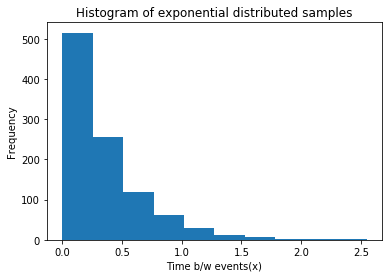

In [24]:
#visualize the normal distribution samples
plt.hist(r)
plt.title('Histogram of exponential distributed samples')
plt.xlabel('Time b/w events(x)'), plt.ylabel('Frequency')
plt.show()

### Probability Density Function (PDF)
Just like the normal distribution previously, we can plot out a PDF from the samples we generated.

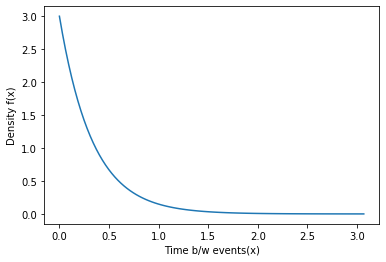

In [25]:
x = np.linspace(expon.ppf(0.0001, loc = 0, scale=scale),expon.ppf(0.9999, loc = 0, scale=scale), 100)
plt.plot(x, expon.pdf(x, loc = 0, scale=scale))
plt.xlabel('Time b/w events(x)'), plt.ylabel('Density f(x)')
plt.show()

<b>Notice that "probability" of certain values like 0.1 can be greater than 1.0! Doesn't that contradict a well-known fact that the largest value a probability can take is 1?!?!</b>

<b>That's because PDF is not a probability but density.</b>

Acually, the PDF f(𝒙) is just a height of the PDF graph at X = 𝒙. While it's true that for <b>discrete</b> random variables, we look up the value of a Probability Mass Function(PMF) at a single point to find its probability P(𝐗=𝒙) (e.g. We could just plug 𝒙 into the Poisson and Bernoulli PMF)

For continuous random variables(eg. in this case), we take an integral of a PDF over a certain interval to find its probability that X will fall in that interval because the probability that 𝐗 takes on any particular continous value 𝒙 is 0 as they have has an uncountably infinite # of possible values that it can take(eg. 0.01 to infinite decimal places). In short: there's no 1 exact value with 1 matching probability.

To calculate the probability from the probability density f(x), we need to take a extremely <b>small interval(d𝒙)</b> around the point 𝒙, for example: <b>[𝒙, 𝒙+d𝒙]</b>

Then the <b>probability</b> that X will fall in [𝒙, 𝒙+d𝒙] is the <b>area under the curve</b> f(𝒙) sandwiched by <b>[𝒙, 𝒙+d𝒙]</b>

If d𝒙 is infinitesimally small, this approximation will be good enough for <b>P(𝐗=𝒙)</b>.

Back to our case here where if the PDF f(x) takes on values greater than 1, if the domain that it integrates over is less than 1, it can add up to only 1.

#### Interpretation

Given a lambda of 3, we could see that the waiting time of next occurence is highly probable within the 1st minute and decaying at a rate of 1/𝜆 as time goes by. The pdf function that we have previously used would simply returns the height of the PDF, or the f(𝒙). Perhaps a more meaningful way to probe is to calculate P(𝐗<=𝒙) and asking a question like the probability of an event occuring within the next 1.5 minute(0 to 1.5)

In [26]:
expon.pdf(0.01, loc = 0, scale=scale) #no!

2.911336600645525

In [27]:
# use cdf to get the cumulative probability: P(X<=1.5)
expon.cdf(1.5, loc = 0, scale=scale)

0.9888910034617577

### Cumulative distribution function (CDF)

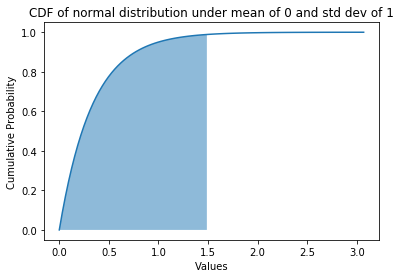

In [28]:
x = np.linspace(expon.ppf(0.0001, loc = 0, scale=scale),expon.ppf(0.9999, loc = 0, scale=scale), 100)
plt.plot(x, expon.cdf(x, loc = 0, scale=scale))
plt.fill_between(x[x<=1.5], 0, expon.cdf(x, loc = 0, scale=scale)[x<=1.5].flatten(),alpha=0.5)
plt.title('CDF of normal distribution under mean of {} and std dev of {}'.format(0,1))
plt.xlabel('Values'), plt.ylabel('Cumulative Probability')
plt.show()

Shaded area is the CDF for P(𝐗<=1.5) which we have talked about earlier.

### Percent Point Function(PPF) - inverse CDF
Given a known probability P(𝐗<=𝒙), what's the value of 𝒙?

In [29]:
expon.ppf(0.98889, loc = 0, scale=scale)

1.4999698917768676

## Binomial Distribution

Binomial distribution is a <b>discrete</b> probability distribution that is useful for expressing <b>number of events(successes)</b> in a sequence of n independent experiments(Bernoulli trial or Bernoulli experiment). Each Bernouilli trial has one possible outcome, success, or failure. In each trial, the probability of success, P(S) = p, is the same.

A few examples in real life:

1) Number of heads in a series of coin flips

2) Number of patients who has benefitted from a new drug(either cure or not cure)

3) Number of conversions for a sample of 100 visitors(assuming all visitors are independent)


Parameterized by number of trials($n$) and probability of success($p$), the general form of its probability mass function(PMF) is:
 
 $$
f(k, n, p)=\operatorname{Pr}(k ; n, p)=\operatorname{Pr}(X=k)=\left(\begin{array}{c}
n \\
k
\end{array}\right) p^{k}(1-p)^{n-k}
$$
$$
\left(\begin{array}{l}
n \\
k
\end{array}\right)=\frac{n !}{k !(n-k) !}
$$

In [30]:
from scipy.stats import binom

For example, we generate a bunch of binomially distributed samples that stimulate 100 coin flips(trials) where each coin flip has 50% probability of getting heads and we repeat this for 200 to observe the probability distribution.

In [31]:
np.random.seed(888)
n, p, size = 100, 0.5, 200
r = binom.rvs(n=n, p=p, size = size)

### Visualizing distribution using histogram
Histogram shows the frequency of the values.

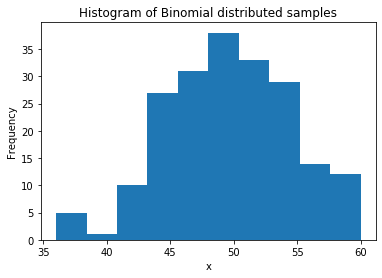

In [32]:
#visualize the normal distribution samples
plt.hist(r)
plt.title('Histogram of Binomial distributed samples')
plt.xlabel('x'), plt.ylabel('Frequency')
plt.show()

### Probability Mass Function (PMF)
Since the Binomal distribution is a discrete distribution, we could use the PMF to find out the P(𝐗=𝒙)

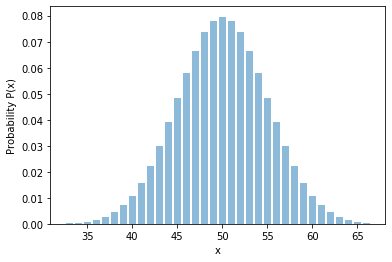

In [33]:
#notice that we use np.arange that returns int(whole number) instead of a continuous num(eg.1.0023)
x = np.arange(binom.ppf(0.01, n, p)-5,binom.ppf(0.99, n, p)+5)
plt.bar(x, binom.pmf(x, n=n, p=p), alpha=0.5, label='Distribution of population')
plt.xlabel('x'), plt.ylabel('Probability P(x)')
plt.show()

For example, to find out the probability that we will see exactly 45 heads; P(𝐗=45)

In [34]:
binom.pmf(50, n=n, p=p)

0.07958923738717888

### Cumulative distribution function (CDF)

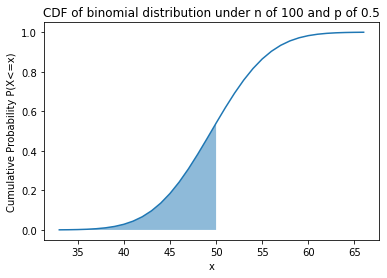

In [35]:
x = np.arange(binom.ppf(0.01, n, p)-5,binom.ppf(0.99, n, p)+5)
plt.plot(x, binom.cdf(x, n, p))
plt.fill_between(x[x<=50], 0, binom.cdf(x,n,p)[x<=50].flatten(),alpha=0.5)
plt.title('CDF of binomial distribution under n of {} and p of {}'.format(n,p))
plt.xlabel('x'), plt.ylabel('Cumulative Probability P(X<=x)')
plt.show()

Again, using CDF, we could probe probabilties like PDF but over a interval of values: like what's the probability that X takes on less or equal than a certain value x, or to be specific P(𝐗<=𝒙).

In [36]:
# cumulative probability of getting 1-50 heads where p=0.5 and n=100
binom.cdf(50, n, p)

0.5397946186935897

### Percent Point Function(PPF) - inverse CDF
Given a known probability P(𝐗<=𝒙), what's the value of 𝒙?

In [37]:
binom.ppf(0.5397, n, p)

50.0

References:
https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(OpenStax)/05%3A_Continuous_Random_Variables/5.04%3A_The_Exponential_Distribution

https://medium.com/@srowen/common-probability-distributions-347e6b945ce4

http://www.math.wm.edu/~leemis/chart/UDR/UDR.html

https://stackoverflow.com/questions/8870982/how-do-i-get-a-lognormal-distribution-in-python-with-mu-and-sigma